# Praca domowa 6

## Zadanie 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [28]:
nad_woda = df.query('waterfront == 1')
a = nad_woda['grade'].median()
nad_woda.query('grade >= @a')['price'].mean()


2302236.3095238097

Odp:

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [33]:
dwa_pietra = df.query('floors == 2')['bathrooms'].mean()
trzy_pietra = df.query('floors == 3')['bathrooms'].mean()
dwa_pietra > trzy_pietra

True

Odp:

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [75]:
srednia_szerokosc = df['lat'].mean()
polnocne_nieruchomosci = df.query('lat > @srednia_szerokosc')
woda = polnocne_nieruchomosci.query('waterfront == 1')
bez_wody = polnocne_nieruchomosci.query('waterfront == 0')
q25_woda = woda['grade'].quantile(0.25)
q75_woda = woda['grade'].quantile(0.75)
q25_bez_wody = bez_wody['grade'].quantile(0.25)
q75_bez_wody = bez_wody['grade'].quantile(0.75)
print("Kwantyl 0.25 dla nieruchomości z widokiem na wodę:", q25_woda)
print("Kwantyl 0.75 dla nieruchomości z widokiem na wodę:", q75_woda)
print("Kwantyl 0.25 dla nieruchomości bez widoku na wodę:", q25_bez_wody)
print("Kwantyl 0.75 dla nieruchomości bez widoku na wodę:", q75_bez_wody)

Kwantyl 0.25 dla nieruchomości z widokiem na wodę: 8.0
Kwantyl 0.75 dla nieruchomości z widokiem na wodę: 11.0
Kwantyl 0.25 dla nieruchomości bez widoku na wodę: 7.0
Kwantyl 0.75 dla nieruchomości bez widoku na wodę: 8.0


Odp:

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [44]:
licznik = df.groupby(by='zipcode').count()
najwiecej_nieruchomosci = licznik['id'].idxmax()
print("kod pocztowy, pod ktorym znajduje się najwięcej nieruchomości:", najwiecej_nieruchomosci)
IQR = df.query('zipcode == @najwiecej_nieruchomosci')['price'].quantile(0.75) - df.query('zipcode == @najwiecej_nieruchomosci')['price'].quantile(0.25)
print("IQR:", IQR)

kod pocztowy, pod ktorym znajduje się najwięcej nieruchomości: 98103
IQR: 262875.0


Odp:

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [51]:
(df.query('sqft_lot15 < sqft_lot').shape[0] / df.shape[0]) * 100

39.78161291815111

Odp:

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [78]:
srednia_szerokosc = df['lat'].mean()
srednia_dlugosc = df['long'].mean()
polnocny_zachod = df.query('lat > @srednia_szerokosc and long < @srednia_dlugosc')
poludniowy_wschod = df.query('lat < @srednia_szerokosc and long > @srednia_dlugosc')
roznica = len(polnocny_zachod) - len(poludniowy_wschod)
procentowa_roznica = (roznica / len(poludniowy_wschod)) * 100
procentowa_roznica

29.665974712209852

Odp:

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

Text(0.5, 1.0, 'Rozkład ocen')

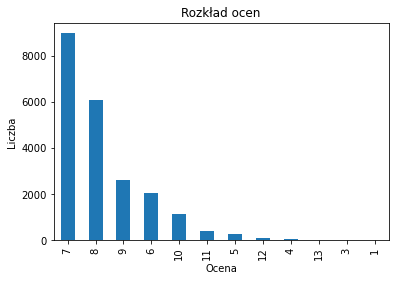

In [55]:
counts = df['grade'].value_counts()
counts.plot(kind = 'bar')
plt.xlabel('Ocena')
plt.ylabel('Liczba')
plt.title('Rozkład ocen')

b)

Text(0.5, 1.0, 'ilość łazienek w nieruchomościach')

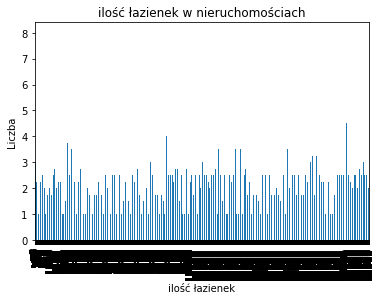

In [64]:
df['bathrooms'].plot(kind = 'bar')
plt.xlabel('ilość łazienek')
plt.ylabel('Liczba')
plt.title('ilość łazienek w nieruchomościach')

c)